# Homework 3: EDA of Bike Sharing

## Introduction

This homework has four goals: 

* to learn how to read plain text delimited data into pandas
* to gain experience preparing data for analysis
* to use EDA to learn about your data 
* to learn how to make informative plots

This assignment includes both specific tasks to perform and open-ended questions to investigate. The open-ended questions ask you to think creatively and critically in how you plot the data and summarize information gleaned from these visualizations.

There are 4 parts to this assignment: 
- data preparation
- exploring the distribution of riders
- exploring the relationship between time and rider counts
- and exploring the relationship between weather and rider counts. 

The data preparation section gives you specific tasks to perform. Then in each of the next three sections, you are asked to create 2 plots. The first plot is described in some detail and the second plot is one of your choosing.

Be sure to choose a plot that provides additional information about the distributions and relationships in the data. Remember that we are interested in how ride sharing works.  Therefore, plots that, for example examine the weather in DC *without reference to ride sharing are not interesting*.

**Be sure that your plots have informative titles, axis labels, and legends.**

In [24]:
# Run this cell to set up your notebook

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')


Assignment: Homework 3
OK, version v1.13.4



In [26]:
ok.auth(force=True) # Change False to True if you are getting errors authenticating


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: aYv42uMT7wLwBt8hYnzVWH088viphy
Successfully logged in as shrey@berkeley.edu


## Loading Bike Sharing Data
The data we are exploring is data on bike sharing in Washington D.C and can be found in `data/bikeshare.txt`.

The variables in this data frame are defined as:
```
instant: record index
dteday : date
season : season (1:spring, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : whether day is holiday or not
weekday : day of the week
workingday : if day is neither weekend nor holiday
weathersit :
    1: Clear or partly cloudy
    2: Mist + clouds
    3: Light Snow or Rain
    4: Heavy Rain or Snow
temp : Normalized temperature in Celsius (divided by 41)
atemp: Normalized feeling temperature in Celsius (divided by 50)
hum: Normalized percent humidity (divided by 100)
windspeed: Normalized wind speed (divided by 67)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including casual and registered
```

In the following we load the raw data into the dataframe `bike`. 

In [27]:
bike = pd.read_csv("data/bikeshare.txt")
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Preparation
Many of the variables that are numeric/integer should be factors. These include holiday, weekday, workingday, and weathersit. In the following question we convert these 4 variables to factors and use appropriate labels for the levels. In particular use the 3 letter label, e.g., Sun, Mon, … for weekday. You may simply use yes/no for holiday and workingday. 

In this exercise we will **overwrite the corresponding variables in the data frame.** However be sure to write a comment in your code about the transformation and leave the underlying datafile `data/bikeshare.txt` unmodified.

### Question 1

#### Question 1a (Decoding `holiday`)
Figure out whether a 0 means yes or no for the holiday column of each row (there are fewer holidays than other days). Translate the numeric entry into a `'yes'` or `'no'` and set `num_holidays` equal to the number of entries in the table corresponding to a holiday. 

In [28]:
# Hint: df.replace( ..., inplace=True)
bike['holiday'].replace(0, 'no', inplace = True)
bike['holiday'].replace(1, 'yes', inplace = True)
num_holidays = (bike['holiday'] == 'yes').sum()

In [29]:
_ = ok.grade('q01a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/ERLgEN
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1b (Decoding `weekday`, `workingday`, and `weathersit`)


Finish decoding the `weekday`, `workingday`, and `weathersit` fields:

1. **`'weekday'`:** It turns out that Monday is the day with the most holidays.  Use that information to change the `'weekday'` column to use the 3 letter label (`'Sun'`, `'Mon'`, ...) instead of its current numerical values.
1. **`'workingday'`:** Convert to `'yes'` and `'no'`.
1. **`'weathersit'`:** You should replace each value with one of `'Clear'`, `'Mist'`, `'Light'`, or `'Heavy'`.

In [30]:
bike['weekday'].replace(0, 'Sun', inplace = True)
bike['weekday'].replace(1, 'Mon', inplace = True)
bike['weekday'].replace(2, 'Tue', inplace = True)
bike['weekday'].replace(3, 'Wed', inplace = True)
bike['weekday'].replace(4, 'Thu', inplace = True)
bike['weekday'].replace(5, 'Fri', inplace = True)
bike['weekday'].replace(6, 'Sat', inplace = True)
bike['workingday'].replace(0, 'no', inplace = True)
bike['workingday'].replace(1, 'yes', inplace = True)
bike['weathersit'].replace(2, 'Mist', inplace = True)
bike['weathersit'].replace(3, 'Light', inplace = True)
bike['weathersit'].replace(1, 'Clear', inplace = True)
bike['weathersit'].replace(4, 'Heavy', inplace = True)


In [31]:
_ = ok.grade('q01b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/M8nqlQ
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the number of daily registered and unregistered users.

Construct a table (dataframe) consisting of:
* `'casual'`: total casual riders for each day
* `'registered'`: total registered riders for each day
* `'workingday'`: whether that day is a working day or not (yes or no)

You will want to use the `groupby` and `aggregate` functions as well as the `sum` and `last` aggregation operators. 

In [32]:
blah = bike.groupby('dteday').sum().reset_index()
blah2 = bike.groupby('dteday').last().reset_index()
blah.drop(['dteday','instant','season','yr','mnth','hr','temp','atemp','hum','windspeed','cnt'],axis = 1,inplace = True)
blah['workingday'] = blah2['workingday']
daily_counts = blah
#daily_counts['registered'] = blah['registered']
#daily_counts['workingday'] = blah2['workingday']
#daily_counts.drop(['dteday','instant','season','yr','mnth','hr','holiday','temp','atemp','hum','windspeed','cnt'],axis = 1,inplace = True)

In [33]:
_ = ok.grade('q01c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/QWrxp7
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2
#### Question 2a

Use the `sns.distplot` function to create a plot that overlays the distribution of the daily counts of casual and registered users. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

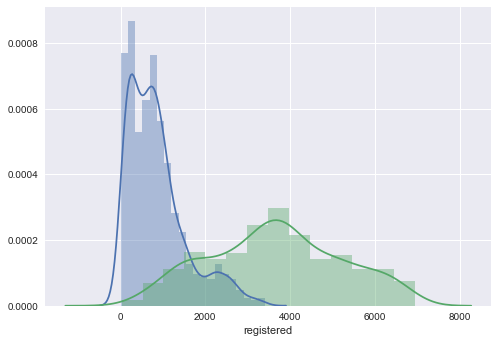

In [34]:
sns.distplot(daily_counts.casual)
sns.distplot(daily_counts.registered)

#### Question 2b

Describe the differences you notice between the density curves for casual and registered riders. Be sure to consider features such as modes, symmetry and skewness, tails, gaps and unusual values. Also comment on the spread of the distributions.

In [35]:
q2b_answer = r"""

Mode - 1. Casual - It is a multimodal distribution
       2. Registered - It is a unimodal symmetric distribution.
Symmetry - 1. Casual - The distribution is not symmetric
           2. Registered - The distribution is symmetric.
Skewness - 1. Casual - The distribution is rigth skewed.
           2. Registered - The distribution is not skewed.
Tails - 1. Casual - Long tail towards the right 
        2. Registered - Tails are equal on both sides.
Gaps - 1. Casual - There is 1 gap
       2. Registered - There are no gaps.
Unusual Values - 1. Casual - There is a peak at 2000.
                 2. Registered - There are no unusual values.
                
"""

display(Markdown(q2b_answer))



Mode - 1. Casual - It is a multimodal distribution
       2. Registered - It is a unimodal symmetric distribution.
Symmetry - 1. Casual - The distribution is not symmetric
           2. Registered - The distribution is symmetric.
Skewness - 1. Casual - The distribution is rigth skewed.
           2. Registered - The distribution is not skewed.
Tails - 1. Casual - Long tail towards the right 
        2. Registered - Tails are equal on both sides.
Gaps - 1. Casual - There is 1 gap
       2. Registered - There are no gaps.
Unusual Values - 1. Casual - There is a peak at 2000.
                 2. Registered - There are no unusual values.
                


### Question 2c

The density plots do not show us how the daily counts for registered and casual riders vary together. Use `sns.lmplot` to make a scatter plot to investigate the relationship between casual and registered counts. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small  to help with over plotting.

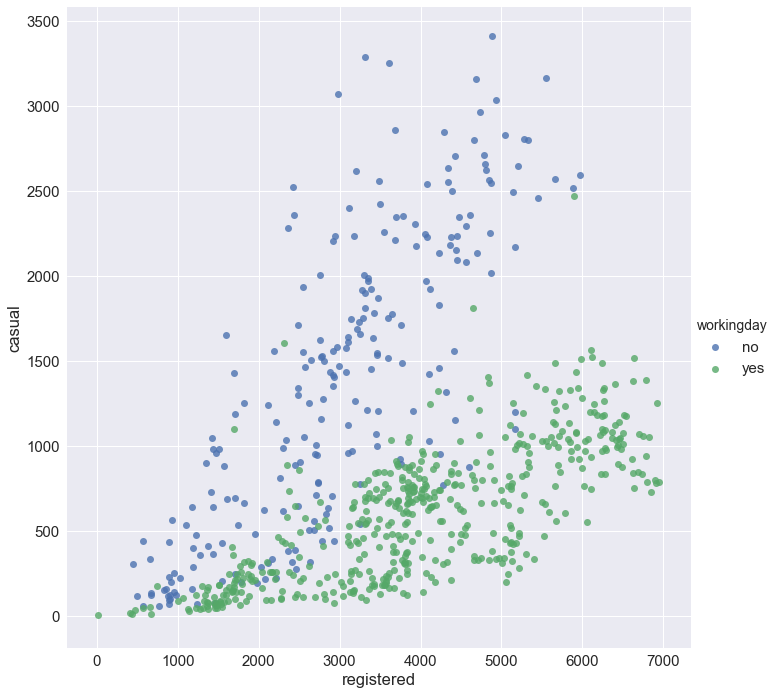

In [36]:
# Make the font size a bit bigger
sns.set(font_scale=1.5)

sns.lmplot('registered',
           'casual',
           data=daily_counts,
           size=10,
           fit_reg=False, 
           hue = 'workingday') 

### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend?
Why might we be concerned with overplotting in examining this relationship? 


In [37]:
q2d_answer = r"""

There were more casual riders on non working days and there were more registered riders on working days.
Overplotting would be bad in this case as we would not be able to figure out the distinction between the fact that a particular day represents a workday or a non work day. It also makes it difficult to see the density of the joint counts.

"""

display(Markdown(q2d_answer))



There were more casual riders on non working days and there were more registered riders on working days.
Overplotting would be bad in this case as we would not be able to figure out the distinction between the fact that a particular day represents a workday or a non work day. It also makes it difficult to see the density of the joint counts.



## Question 3

### Question 3a Bivariate Kernel Density Plot
 
The scatter plot you made in question 2c makes clear the separation between the work days and weekend days.  However, the overplotting
makes it difficult to see the density of the joint counts. To address this
issue, let's try visualizing the data with another technique, the kernel density plot.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

The result we wish to achieve should be a plot that looks like this:

<img src='bivariate_kde_of_daily_rider_types.png' >

Making this plot can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

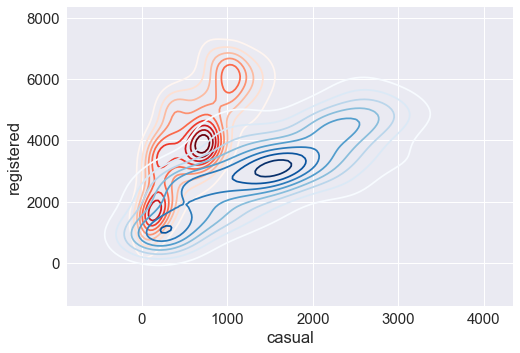

In [38]:
# Set 'ind' to a boolean condition that will allow you to filter daily_counts for rows corresponding to workingdays
indd = daily_counts[daily_counts['workingday'] == 'yes']

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on weekdays
# Hint: use loc and ind to splice out the relevant rows and column (casual/registered)
casual_weekday = indd['casual']
registered_weekday = indd['registered']

# User sns.kdeplot to plot the bivariate KDE for weekday rides

sns.kdeplot(casual_weekday,registered_weekday, cmap="Reds")

# Repeat the same steps above but for rows corresponding to non-workingdays

ind = daily_counts[daily_counts['workingday'] == 'no']

casual_weekend = ind['casual']
registered_weekend = ind['registered']

sns.kdeplot(casual_weekend,registered_weekend, cmap="Blues")


#### Question 3b

What does the contour plot reveal about the relationship between casual and registered riders for both weekdays and weekends? How is it an improvement over the scatter plot you created in Q2c?

In [39]:
q3b_answer = r"""

From the contour plot we see that there are more registered riders ride on weekdays and more casual riders ride on weekends. Additionally there is minimal overlap between the two.
"""

display(Markdown(q3b_answer))



From the contour plot we see that there are more registered riders ride on weekdays and more casual riders ride on weekends. Additionally there is minimal overlap between the two.


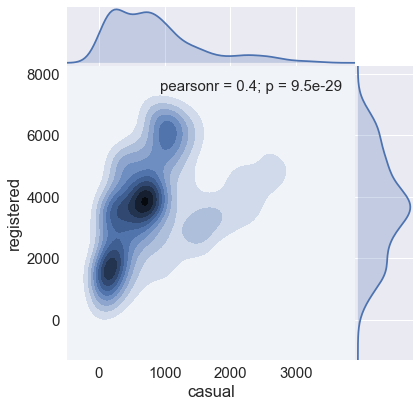

In [40]:
g = sns.jointplot("casual", "registered", data=daily_counts,
...                   kind="kde", space=0)

## Exploring Ride Sharing and Time

### Question 4a

Plot number of riders for each hour of each day in the month of June in 2011. 

Make sure to add descriptive x-axis and y-axis labels and create a legend to distinguish the line for casual riders and the line for registered riders. The end result should look like this:

<img src="june_riders.png" width='800px'/>

/Users/ShreyMalhotra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


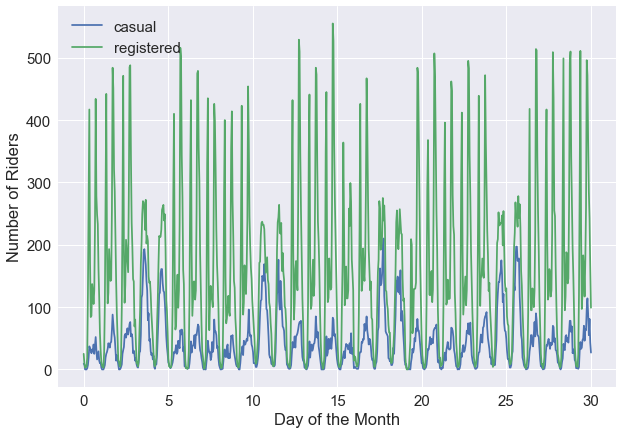

In [41]:
# This makes the plot bigger
plt.figure(figsize=(10, 7))

bikers2011 = bike[bike['yr'] == 0]
bikers2011june = bikers2011[bikers2011['mnth'] == 6]
bikers2011june['dteday'] = pd.to_datetime(bikers2011june['dteday'])
bikersbyhourdate = bikers2011june.groupby(['dteday','hr']).sum().reset_index()
bikersbyhourdate['instant'] = bikersbyhourdate['instant'] - 3531
bikersbyhourdate['instant'] = bikersbyhourdate['instant']/719
bikersbyhourdate['instant'] = bikersbyhourdate['instant']*30
bikersbyhourdate.index = bikersbyhourdate['instant']

plt.plot(bikersbyhourdate['casual'], label ='casual')
plt.plot(bikersbyhourdate['registered'],label = 'registered')
plt.legend(loc='upper left')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Riders')

#### Question 4b

This plot has several interesting features. How do the number of casual and registered riders compare for different days of the month? What is an interesting trend and pattern you notice between the lines?

In [42]:
q4b_answer = r"""

The number of regustered riders are greater than the number of casual riders on all days.
After evert 6-9 peaks of registered riders, the number of casual and registered riders are at a comparatively similar number for 2 consequtive peaks. This pattern repeats 4 times in the month which might correspond to twice every week in a month as there are approximately 4 weeks in every month.

"""

display(Markdown(q4b_answer))



The number of regustered riders are greater than the number of casual riders on all days.
After evert 6-9 peaks of registered riders, the number of casual and registered riders are at a comparatively similar number for 2 consequtive peaks. This pattern repeats 4 times in the month which might correspond to twice every week in a month as there are approximately 4 weeks in every month.



## Question 5 (Understanding Daily Patterns)

Let's examine the behavior or riders by plotting the average number of riders for each hour of the day over the entire dataset stratified by rider type.  

Your plot should look like the following:

<img src="diurnal_bikes.png" width="800px"/>

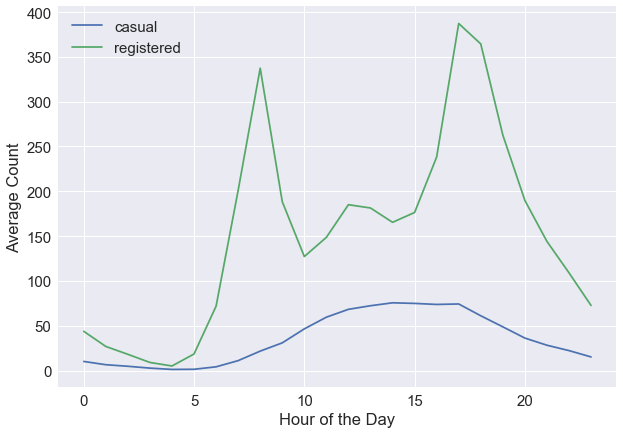

In [43]:
# This makes the plot bigger
plt.figure(figsize=(10, 7))


bike['dteday'] = pd.to_datetime(bike['dteday'])
bike2 = bike.groupby(['hr']).mean().reset_index()
plt.plot(bike2['casual'], label ='casual')
plt.plot(bike2['registered'],label = 'registered')
plt.legend(loc='upper left')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')

#### Question 5b

What can you observe from the plot, what does those peaks mean?

In [44]:
q5b_answer = r"""

These peaks signify the hour of the day in which there were the maximum amount of riders. We can see that the maximum amount of riders occur around hour 7 and hour 17-18 which means that the maximum amount of registered riders were in the morning and evening.
For casual riders there are no obervable peaks however the number of riders in the afternoon to evening were higher than the ones in the monring.

"""

display(Markdown(q5b_answer))



These peaks signify the hour of the day in which there were the maximum amount of riders. We can see that the maximum amount of riders occur around hour 7 and hour 17-18 which means that the maximum amount of registered riders were in the morning and evening.
For casual riders there are no obervable peaks however the number of riders in the afternoon to evening were higher than the ones in the monring.



## Exploring Ride Sharing and Weather
### Question 6
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

#### Question 6a
Create a new column `propCasual` in the `bike` dataframe representing the proportion of casual riders comparing to the total number of riders.



In [45]:
bike['propCasual'] = bike['casual']/(bike['registered'] + bike['casual'])

In [46]:
_ = ok.grade('q06a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/o2WBrN
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 6b
In order to examine the relationship between proportion of casual riders and temerature, we can make some bivariate scatterplot using `sns.swarmplot` or `sns.lmplot`. We can even use color/hue to encode the information about day of week. Run the following cells to create such plots. (Plot contains lots of points, so it may a while for it to render)


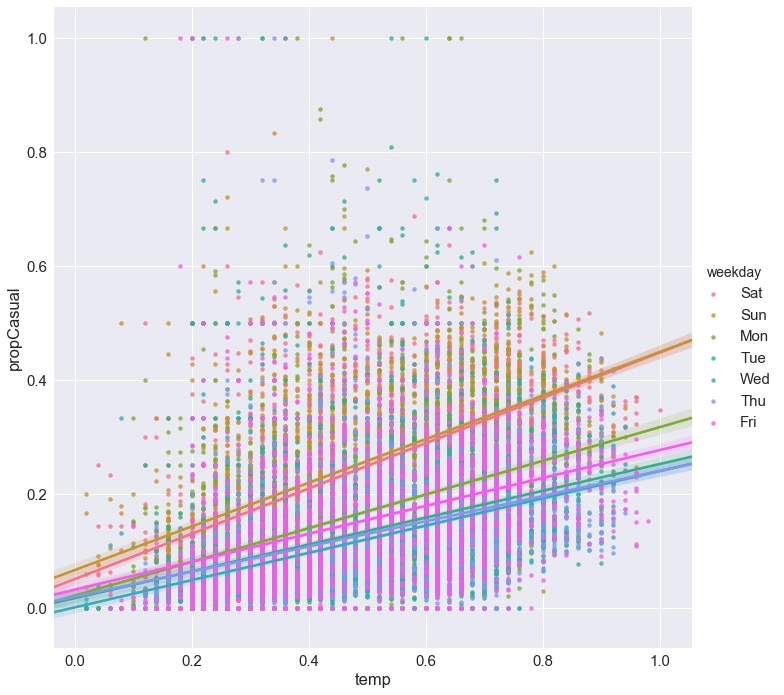

In [47]:
sns.lmplot(data=bike,x="temp",y="propCasual",hue="weekday",scatter_kws={"s": 20},size=10)

As you can see from the scatterplot, many points are overlapping. Though the plot can show some trends, it would be hard to verify your findings. Therefore we could fit some curves to summarize the data and plot the curves instead.

Basically you will need to make a plot like this: Fit and plot curves using data from different weekdays. 

<img src="curveplot_temp_propCasual.png" width=500px>

You will need to use the function [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) to fit a curve from two sequences `x` and `y`. You may find the example below helpful.



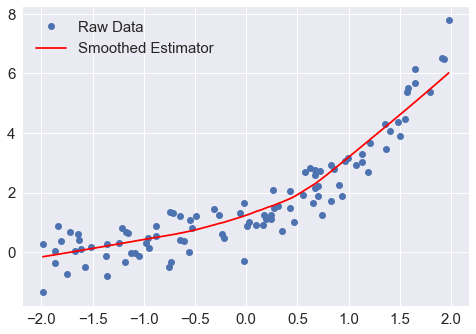

In [48]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 -2)
yobs = np.exp(xobs) + np.random.randn(100)/2.0
plt.plot(xobs, yobs, 'o', label = "Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
plt.plot(xobs, ysmooth, 'r-', label ="Smoothed Estimator")
plt.legend()

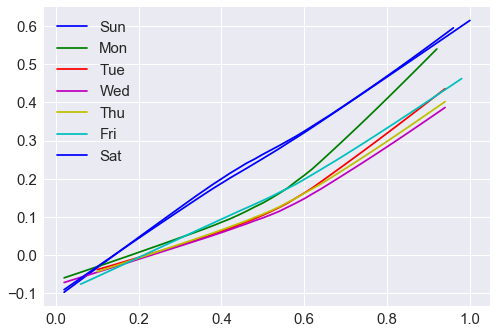

In [49]:
#Make some plots here...
sundata = bike[bike['weekday'] == 'Sun']
mondata = bike[bike['weekday'] == 'Mon']
tuedata = bike[bike['weekday'] == 'Tue']
weddata = bike[bike['weekday'] == 'Wed']
thudata = bike[bike['weekday'] == 'Thu']
fridata = bike[bike['weekday'] == 'Fri']
satdata = bike[bike['weekday'] == 'Sat']
sunx = np.sort(sundata['temp'])
suny = np.sort(sundata['propCasual'])
sunsmooth = lowess(suny, sunx, return_sorted=False)
plt.plot(sunx, sunsmooth, 'b-', label ="Sun")
plt.legend()
monx = np.sort(mondata['temp'])
mony = np.sort(mondata['propCasual'])
monsmooth = lowess(mony, monx, return_sorted=False)
plt.plot(monx, monsmooth, 'g-', label ="Mon")
plt.legend()
tuex = np.sort(tuedata['temp'])
tuey = np.sort(tuedata['propCasual'])
tuesmooth = lowess(tuey, tuex, return_sorted=False)
plt.plot(tuex, tuesmooth, 'r-', label ="Tue")
plt.legend()
wedx = np.sort(weddata['temp'])
wedy = np.sort(weddata['propCasual'])
wedsmooth = lowess(wedy, wedx, return_sorted=False)
plt.plot(wedx, wedsmooth, 'm-', label ="Wed")
plt.legend()
thux = np.sort(thudata['temp'])
thuy = np.sort(thudata['propCasual'])
thusmooth = lowess(thuy, thux, return_sorted=False)
plt.plot(thux, thusmooth, 'y-', label ="Thu")
plt.legend()
frix = np.sort(fridata['temp'])
friy = np.sort(fridata['propCasual'])
frismooth = lowess(friy, frix, return_sorted=False)
plt.plot(frix, frismooth, 'c-', label ="Fri")
plt.legend()
satx = np.sort(satdata['temp'])
saty = np.sort(satdata['propCasual'])
satsmooth = lowess(saty, satx, return_sorted=False)
plt.plot(satx, satsmooth, 'b-', label ="Sat")
plt.legend()

#### Question 6c
What can you discover from the curve plot? How is the propCasual changing?

In [50]:
q6c_answer = r"""

The curves represent the changing proportion of Casual Riders for given temperatures on each day of the week. From the curves we can see that the poportion of causal riders increses as the temperature increases for all days. The increase is highest on the Weekends. 

"""

display(Markdown(q6c_answer))



The curves represent the changing proportion of Casual Riders for given temperatures on each day of the week. From the curves we can see that the poportion of causal riders increses as the temperature increases for all days. The increase is highest on the Weekends. 



In [51]:
list(bike['weekday'].iloc[::2000])

['Sat', 'Tue', 'Mon', 'Mon', 'Mon', 'Sun', 'Sun', 'Sat', 'Sun']

## Submission

Run the cell below to run all the OkPy tests at once:

In [52]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [53]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Submit... 100% complete
Submission successful for user: shrey@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/submissions/XDBGOl
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit

